In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import math 
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import warnings

import ipywidgets as widgets
from ipywidgets import interact
from sklearn.model_selection import train_test_split



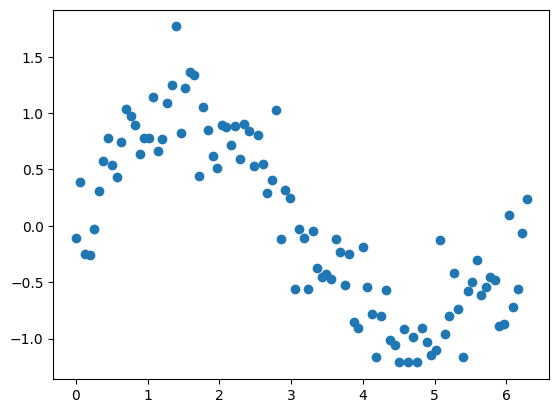

In [2]:
n=100
X1=np.linspace(0,2*math.pi,n)
y=np.sin(X1)+ 0.3 * np.random.randn(n)
X=np.c_[np.ones(len(X1)),X1]

plt.scatter(X1,y)

plt.show()

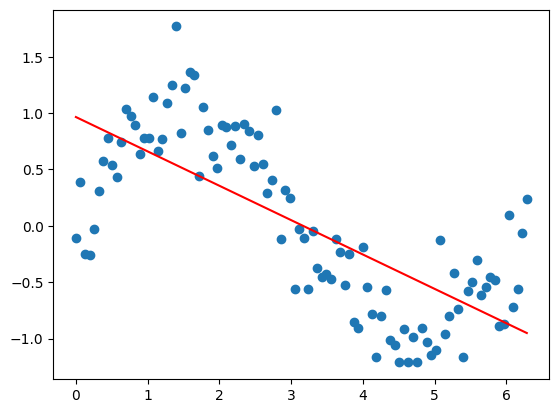

MSE= 0.27024121796640865


In [3]:
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
y_pred = model.predict(X)
plt.scatter(X1,y)
plt.plot(X1,y_pred,color="red")
plt.show()
print(f"MSE= {mean_squared_error(y,y_pred)}")

In [4]:
n=100
X1=np.linspace(0,2*math.pi,n)
y=np.sin(X1)+ 0.3 * np.random.randn(n)

X2=X1**2
X=np.c_[np.ones(len(X1)),X1,X2]

In [5]:
X

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 6.34665183e-02, 4.02799894e-03],
       [1.00000000e+00, 1.26933037e-01, 1.61119958e-02],
       [1.00000000e+00, 1.90399555e-01, 3.62519905e-02],
       [1.00000000e+00, 2.53866073e-01, 6.44479830e-02],
       [1.00000000e+00, 3.17332591e-01, 1.00699973e-01],
       [1.00000000e+00, 3.80799110e-01, 1.45007962e-01],
       [1.00000000e+00, 4.44265628e-01, 1.97371948e-01],
       [1.00000000e+00, 5.07732146e-01, 2.57791932e-01],
       [1.00000000e+00, 5.71198664e-01, 3.26267914e-01],
       [1.00000000e+00, 6.34665183e-01, 4.02799894e-01],
       [1.00000000e+00, 6.98131701e-01, 4.87387872e-01],
       [1.00000000e+00, 7.61598219e-01, 5.80031847e-01],
       [1.00000000e+00, 8.25064737e-01, 6.80731821e-01],
       [1.00000000e+00, 8.88531256e-01, 7.89487792e-01],
       [1.00000000e+00, 9.51997774e-01, 9.06299761e-01],
       [1.00000000e+00, 1.01546429e+00, 1.03116773e+00],
       [1.00000000e+00, 1.07893

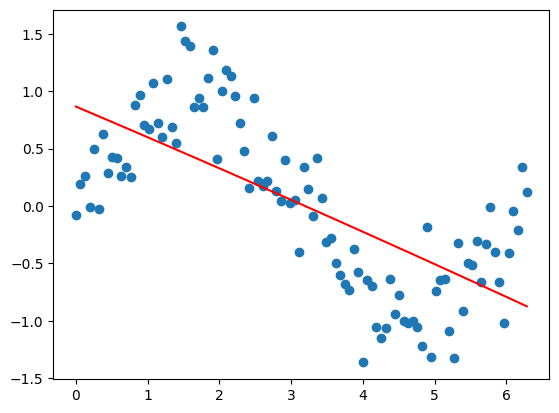

MSE= 0.28150125165610046


In [6]:
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
y_pred = model.predict(X)
plt.scatter(X1,y)
plt.plot(X1,y_pred,color="red")
plt.show()
print(f"MSE= {mean_squared_error(y,y_pred)}")

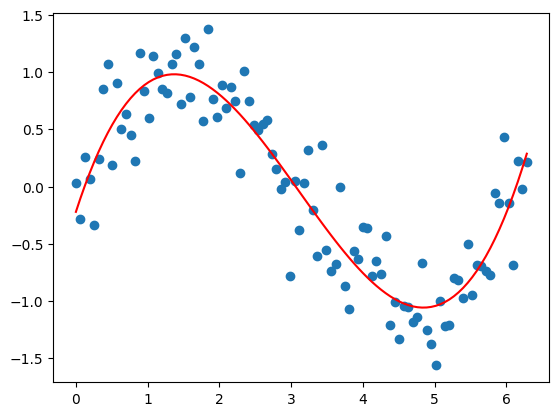

MSE= 0.08805634472188074


In [7]:
n=100
X1=np.linspace(0,2*math.pi,n)
y=np.sin(X1)+ 0.3 * np.random.randn(n)

X2=X1**2
X3=X1**3
X=np.c_[np.ones(len(X1)),X1,X2,X3]

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
y_pred = model.predict(X)
plt.scatter(X1,y)
plt.plot(X1,y_pred,color="red")
plt.show()
print(f"MSE= {mean_squared_error(y,y_pred)}")

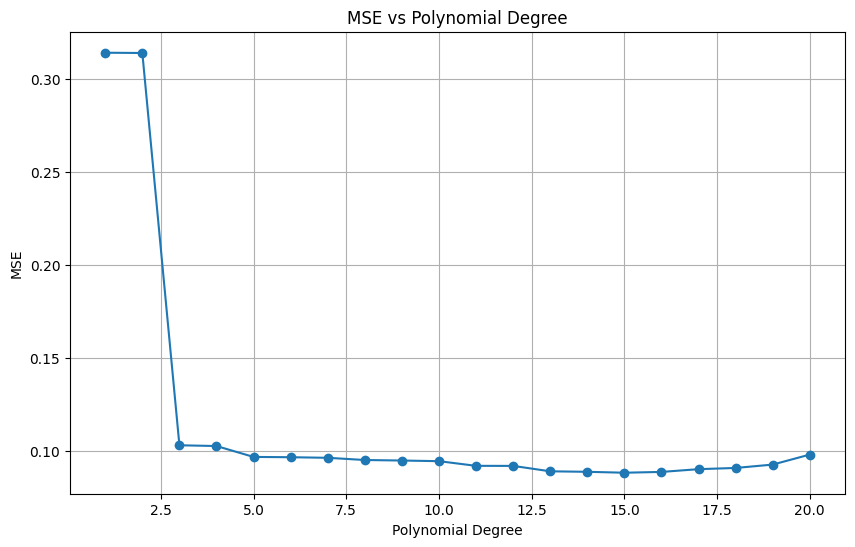

In [8]:
# Generate data
n = 100
X1 = np.linspace(0, 2 * math.pi, n)
y = np.sin(X1) + 0.3 * np.random.randn(n)

mse_list = []
degrees = range(1, 21)

for d in degrees:   
    X_poly = np.vander(X1, N=d+1, increasing=True)   
    model = LinearRegression(fit_intercept=False)
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    mse = mean_squared_error(y, y_pred)
    mse_list.append(mse)

# Plot MSE vs polynomial degree
plt.figure(figsize=(10, 6))
plt.plot(degrees, mse_list, marker="o")
plt.xlabel("Polynomial Degree")
plt.ylabel("MSE")
plt.title("MSE vs Polynomial Degree")
plt.grid(True)
plt.show()

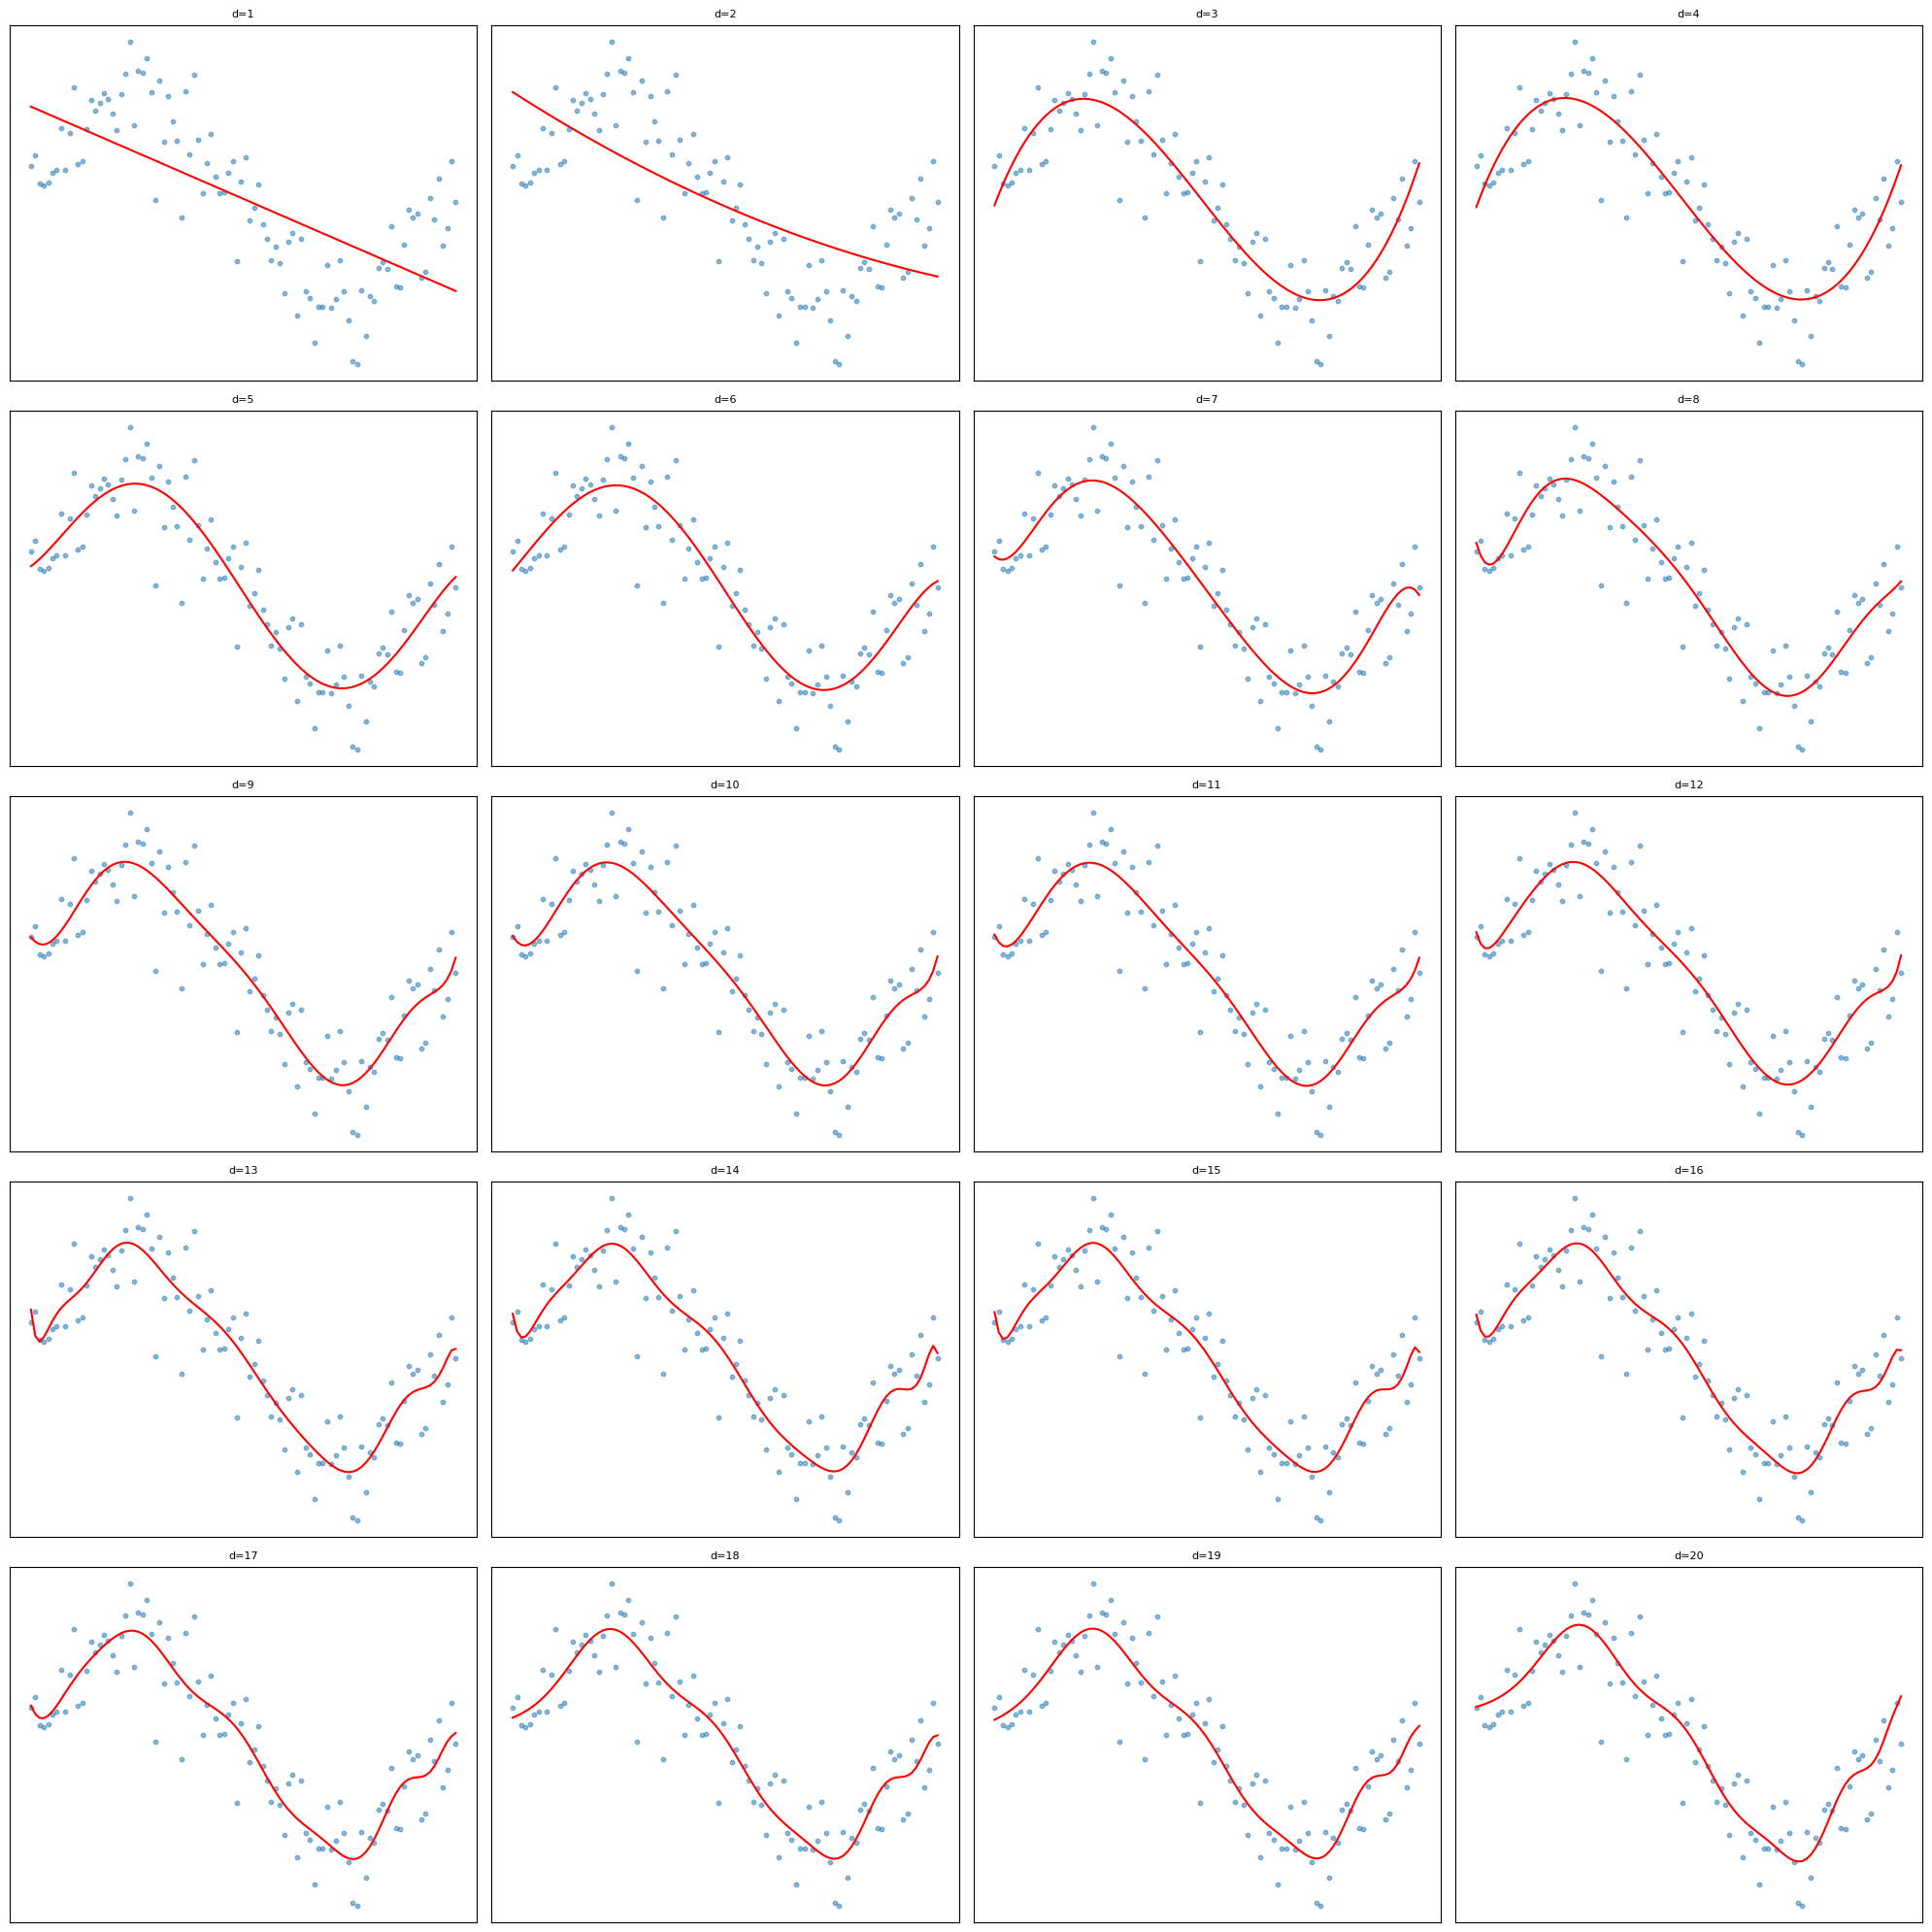

In [9]:
n = 100
X1 = np.linspace(0, 2 * math.pi, n)
y = np.sin(X1) + 0.3 * np.random.randn(n)


fig, axes = plt.subplots(5, 4, figsize=(20, 20))
axes = axes.ravel()

for d in range(1, 21):    
    X_poly = np.vander(X1, N=d+1, increasing=True)    
    model = LinearRegression(fit_intercept=False)
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)    
    
    ax = axes[d-1]
    ax.scatter(X1, y, s=10, alpha=0.5)
    ax.plot(X1, y_pred, color="red")
    ax.set_title(f"d={d}", fontsize=8)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

In [10]:
def Lagrange_polynomial(x, y, x_value):
    n = len(x)
    result = 0

    for i in range(n):
        term = y[i]
        for j in range(n):
            if i != j:
                term = term * (x_value - x[j]) / (x[i] - x[j])
        result += term

    return result


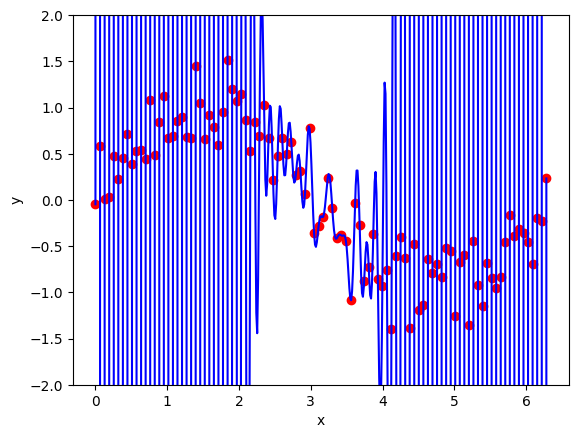

In [11]:
n = 100
x1 = np.linspace(0, 2 * math.pi, n)
y = np.sin(x1) + 0.3 * np.random.randn(n) 

x_plot = np.linspace(0, 2 * math.pi, 500)  
y_plot = np.array([Lagrange_polynomial(x1, y, xi) for xi in x_plot])


plt.plot(x_plot, y_plot, color='blue')

plt.scatter(x1, y, color='red')


plt.xlabel('x')
plt.ylabel('y')

plt.ylim(-2,2)

plt.show()

In [15]:
from sklearn.preprocessing import PolynomialFeatures 

X=np.array([[1,2],[4,5]])
print(X)
poly = PolynomialFeatures(3,include_bias=False,interaction_only=False)
X=poly.fit_transform(X)
print(X)

[[1 2]
 [4 5]]
[[  1.   2.   1.   2.   4.   1.   2.   4.   8.]
 [  4.   5.  16.  20.  25.  64.  80. 100. 125.]]


# PolynomialFeatures

## 1. interaction_only=True
Добавляются **только произведения разных признаков** (без степеней):

$$
[ x_1,\; x_2,\; x_1 x_2 ]
$$

---

## 2. interaction_only=False
Добавляются **и степени, и комбинации**:

$$
[ x_1,\; x_2,\; x_1^2,\; x_1 x_2,\; x_2^2,\; x_1^3,\; x_1^2 x_2,\; x_1 x_2^2,\; x_2^3 ]
$$

---

## Сравнительная таблица

| Режим | Степень 1 | Степень 2 | Степень 3 |
|-------|-----------|-----------|-----------|
| **interaction_only=True**  | $x_1, x_2$ | $x_1 x_2$ | — |
| **interaction_only=False** | $x_1, x_2$ | $x_1^2, x_1 x_2, x_2^2$ | $x_1^3, x_1^2 x_2, x_1 x_2^2, x_2^3$ |


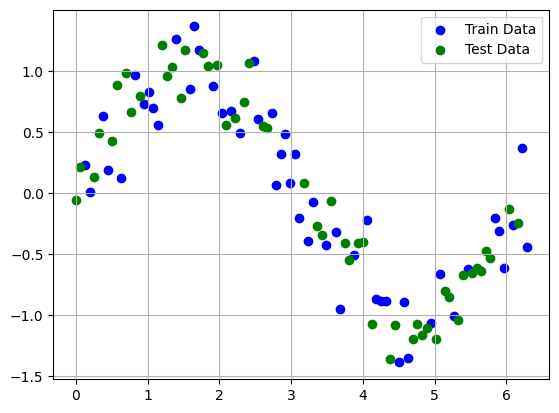

In [59]:
np.random.seed(123)
n=100
x_train=np.linspace(0,2*math.pi,n)
x_test = np.random.choice(x_train, 50, replace=False)
x_train = np.setdiff1d(x_train, x_test)

y_train=np.sin(x_train)+ 0.22 * np.random.randn(len(x_train))
y_test=np.sin(x_test)+ 0.22 * np.random.randn(len(x_test))

plt.scatter(x_train,y_train,color="blue",label="Train Data")
plt.scatter(x_test,y_test,color="green",label="Test Data")

plt.legend()
plt.grid()
plt.show()

Лучшая степень по тесту: 3


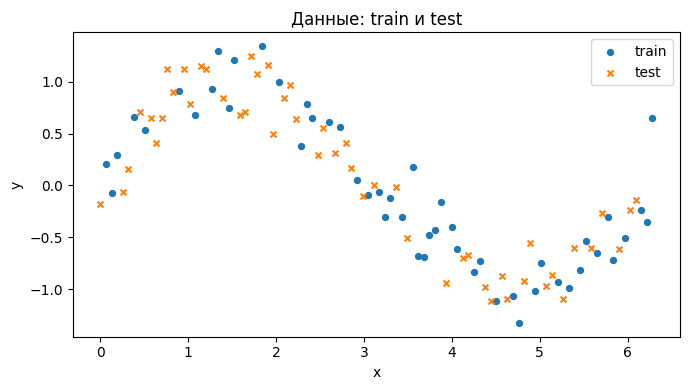

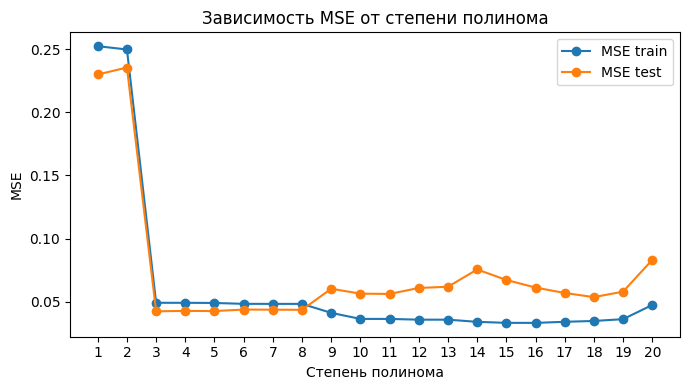

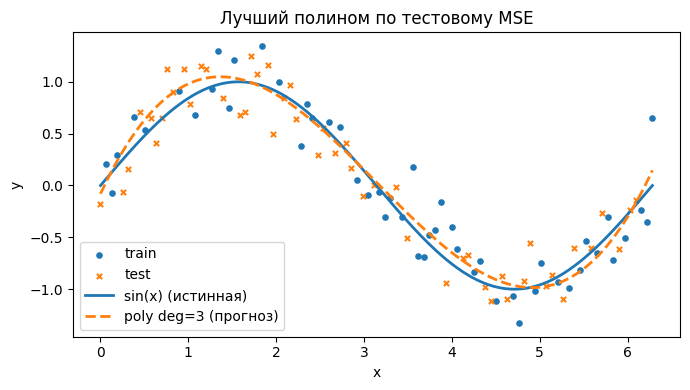

In [16]:
#Code
np.random.seed(42)

n = 100
x_train = np.linspace(0, 2*math.pi, n)
x_test  = np.random.choice(x_train, 50, replace=False)
x_train = np.setdiff1d(x_train, x_test)

y_train = np.sin(x_train) + 0.22 * np.random.randn(len(x_train))
y_test  = np.sin(x_test)  + 0.22 * np.random.randn(len(x_test))

mse_test = []
mse_train = []
models = {}
degrees = range(1, 21)

for d in degrees:
    poly = PolynomialFeatures(d, include_bias=False)
    X_train_poly = poly.fit_transform(x_train.reshape(-1,1))
    X_test_poly  = poly.transform(x_test.reshape(-1,1))

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pred_tr = model.predict(X_train_poly)
    y_pred_te = model.predict(X_test_poly)

    mse_train.append(mean_squared_error(y_train, y_pred_tr))
    mse_test.append(mean_squared_error(y_test,  y_pred_te))
    models[d] = (poly, model)

best_degree = degrees[int(np.argmin(mse_test))]
best_poly, best_model = models[best_degree]

x_grid = np.linspace(0, 2*math.pi, 400)
y_grid_true = np.sin(x_grid)
X_grid_poly = best_poly.transform(x_grid.reshape(-1,1))
y_grid_pred = best_model.predict(X_grid_poly)

print(f"Лучшая степень по тесту: {best_degree}")

# 1) Train / Test точки
plt.figure(figsize=(7,4))
plt.scatter(x_train, y_train, s=18, label='train')
plt.scatter(x_test,  y_test,  s=18, marker='x', label='test')
plt.title('Данные: train и test')
plt.xlabel('x'); plt.ylabel('y')
plt.legend(); plt.tight_layout()
plt.show()

plt.figure(figsize=(7,4))
plt.plot(list(degrees), mse_train, marker='o', label='MSE train')
plt.plot(list(degrees), mse_test,  marker='o', label='MSE test')
plt.xlabel('Степень полинома'); plt.ylabel('MSE')
plt.title('Зависимость MSE от степени полинома')
plt.xticks(list(degrees))
plt.legend(); plt.tight_layout()
plt.show()

plt.figure(figsize=(7,4))
plt.scatter(x_train, y_train, s=14, label='train')
plt.scatter(x_test,  y_test,  s=14, marker='x', label='test')
plt.plot(x_grid, y_grid_true, linewidth=2, label='sin(x) (истинная)')
plt.plot(x_grid, y_grid_pred, linewidth=2, linestyle='--',
         label=f'poly deg={best_degree} (прогноз)')
plt.xlabel('x'); plt.ylabel('y')
plt.title('Лучший полином по тестовому MSE')
plt.legend(); plt.tight_layout()
plt.show() 
    

In [20]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)  # L2-регуляризация



In [21]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.1)               # L1-регуляризация


In [22]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=0.1, l1_ratio=0.5)


In [17]:
def f(x):
    return np.cos(1.5 * np.pi * x)

def generate_data(n_samples=30):
    x = np.sort(np.random.rand(n_samples))
    y = f(x) + 0.1 * np.random.randn(n_samples) 
    return x, y

def plot_coef(theta, ax=None):
   
    if ax is None:
        ax = plt.gca()
    theta = np.asarray(theta).ravel()

    ax.clear()  
    idx = np.arange(1, len(theta) + 1)
    ax.bar(idx, np.abs(theta))          
    ax.set_xlabel('feature index (degree)')
    ax.set_ylabel('|coefficient|')
    ax.set_title('Coefficients (magnitude)')

   
    labels = [r'$x$' if i==1 else rf'$x^{i}$' for i in range(1, len(theta)+1)]
    ax.set_xticks(idx)
    ax.set_xticklabels(labels)

In [18]:
n_samples = 30 
x, y = generate_data(n_samples)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.40)
xtrain_inx=np.argsort(X_train)
X_train=X_train[xtrain_inx]
y_train=y_train[xtrain_inx]

def update(value):
    poly = PolynomialFeatures(int(value),include_bias=False)    
    X_poly=poly.fit_transform(X_train.reshape(-1,1))
    X_test_poly=poly.transform(X_test.reshape(-1, 1))
    theta=np.linalg.inv(X_poly.T@X_poly)@X_poly.T@y_train
    print(theta)
    y_pred= X_poly @ theta
    y_test_poly= X_test_poly @ theta
    mse_test=mean_squared_error(y_test,y_test_poly)    
    mse_train=mean_squared_error(y_train,y_pred)
    
    fig, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(12, 4), dpi=300, constrained_layout=True)

    
    ax_left.plot(X_train, y_pred)
    ax_left.scatter(X_train, y_train, s=50, alpha=0.5, label="Train Data")
    ax_left.scatter(X_test,  y_test,  s=50, alpha=0.5, label="Test Data")
    ax_left.set_xlim(0, 1)
    ax_left.set_ylim(-2, 2)
    ax_left.set_title(f"MSE(Train): {mse_train:.4f} , MSE(Test): {mse_test:.4f}")
    ax_left.legend()

   
    plot_coef(theta, ax=ax_right)

    plt.show()

interact(update, value=widgets.IntSlider(value=1, min=1, max=20, step=1))


interactive(children=(IntSlider(value=1, description='value', max=20, min=1), Output()), _dom_classes=('widget…

<function __main__.update(value)>

## L2 Regularization (Ridge)
$$ L_{2} = \lambda \sum_{i=1}^{n} \theta_i^2 $$

In [23]:

def update(value,alpha):
    alpha=float(alpha)
    poly = PolynomialFeatures(int(value),include_bias=False)    
    X_poly=poly.fit_transform(X_train.reshape(-1,1))
    X_test_poly=poly.transform(X_test.reshape(-1, 1))
    ridge_model  = Ridge(alpha=alpha)
    ridge_model .fit(X_poly, y_train)
    print(f"{ridge_model.coef_},{ridge_model.intercept_} ")
    y_pred= ridge_model.predict(X_poly)
    y_test_poly= ridge_model.predict(X_test_poly)
    mse_test=mean_squared_error(y_test,y_test_poly)    
    mse_train=mean_squared_error(y_train,y_pred)
    
    fig, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(12, 4), dpi=300, constrained_layout=True)

    
    ax_left.plot(X_train, y_pred)
    ax_left.scatter(X_train, y_train, s=50, alpha=0.5, label="Train Data")
    ax_left.scatter(X_test,  y_test,  s=50, alpha=0.5, label="Test Data")
    ax_left.set_xlim(0, 1)
    ax_left.set_ylim(-2, 2)
    ax_left.set_title(f"MSE(Train): {mse_train:.4f} , MSE(Test): {mse_test:.4f}")
    ax_left.legend()

   
    plot_coef(ridge_model.coef_, ax=ax_right)

    plt.show()

interact(update, value = widgets.IntSlider(value=1, min=1, max=20, step=1),alpha = widgets.Dropdown(
    options=['1.0','0.1', '0.01', '0.001', '0.0001', '0.00001', '0.000001', '0.0000001', '0.00000001','0.0'],
    value='0.1',
    description='Number:',
    disabled=False,
) )


interactive(children=(IntSlider(value=1, description='value', max=20, min=1), Dropdown(description='Number:', …

<function __main__.update(value, alpha)>

## L1 Regularization (Lasso)

$$ L_{1} = \lambda \sum_{i=1}^{n} |\theta_i| $$


In [24]:

def update(value,alpha):
    alpha=float(alpha)
    poly = PolynomialFeatures(int(value),include_bias=False)    
    X_poly=poly.fit_transform(X_train.reshape(-1,1))
    X_test_poly=poly.transform(X_test.reshape(-1, 1))
    lasso_model  = Lasso(alpha=alpha)
    lasso_model .fit(X_poly, y_train)

    print(f"{lasso_model.coef_},{lasso_model.intercept_} ")
    y_pred= lasso_model.predict(X_poly)
    y_test_poly= lasso_model.predict(X_test_poly)
    mse_test=mean_squared_error(y_test,y_test_poly)    
    mse_train=mean_squared_error(y_train,y_pred)
    
    fig, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(12, 4), dpi=300, constrained_layout=True)

    
    ax_left.plot(X_train, y_pred)
    ax_left.scatter(X_train, y_train, s=50, alpha=0.5, label="Train Data")
    ax_left.scatter(X_test,  y_test,  s=50, alpha=0.5, label="Test Data")
    ax_left.set_xlim(0, 1)
    ax_left.set_ylim(-2, 2)
    ax_left.set_title(f"MSE(Train): {mse_train:.4f} , MSE(Test): {mse_test:.4f}")
    ax_left.legend()

   
    plot_coef(lasso_model.coef_, ax=ax_right)

    plt.show()

interact(update, value = widgets.IntSlider(value=1, min=1, max=20, step=1),alpha = widgets.Dropdown(
    options=['1.0','0.1', '0.01', '0.001', '0.0001', '0.00001', '0.000001', '0.0000001', '0.00000001','0.0'],
    value='0.1',
    description='Number:',
    disabled=False,
) )


interactive(children=(IntSlider(value=1, description='value', max=20, min=1), Dropdown(description='Number:', …

<function __main__.update(value, alpha)>

## Elastic net (L1+L2) Regularization

$$ L_{\text{elastic net}} = \lambda_1 \sum_{i=1}^{n} |\theta_i| + \lambda_2 \sum_{i=1}^{n} \theta_i^2 $$

In [26]:

def update_elastic(value, alpha, l1_ratio):
    degree   = int(value)
    alpha    = float(alpha)
    l1_ratio = float(l1_ratio)

    
    poly = PolynomialFeatures(degree, include_bias=False)
    X_poly      = poly.fit_transform(X_train.reshape(-1, 1))
    X_test_poly = poly.transform(X_test.reshape(-1, 1))

    
    if alpha == 0.0:
        model = LinearRegression()  
    else:
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=100000)

    model.fit(X_poly, y_train)
    print(f"coef_ = {model.coef_}\nintercept_ = {model.intercept_}")

    
    y_pred_train = model.predict(X_poly)
    y_pred_test  = model.predict(X_test_poly)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test  = mean_squared_error(y_test,  y_pred_test)

    
    fig, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(12, 4), dpi=300, constrained_layout=True)
    ax_left.plot(X_train, y_pred_train)
    ax_left.scatter(X_train, y_train, s=50, alpha=0.5, label="Train Data")
    ax_left.scatter(X_test,  y_test,  s=50, alpha=0.5, label="Test Data")
    ax_left.set_xlim(0, 1)
    ax_left.set_ylim(-2, 2)
    ax_left.set_title(f"MSE(Train): {mse_train:.4f} , MSE(Test): {mse_test:.4f}")
    ax_left.legend()

    plot_coef(model.coef_, ax=ax_right)
    plt.show()

interact(
    update_elastic,
    value = widgets.IntSlider(value=1, min=1, max=20, step=1, description='degree'),
    alpha = widgets.Dropdown(
        options=['1.0','0.1','0.01','0.001','0.0001','0.00001','0.000001','0.0000001','0.00000001','0.0'],
        value='0.1',
        description='alpha'
    ),
    l1_ratio = widgets.FloatSlider(value=0.5, min=0.0, max=1.0, step=0.05, description='l1_ratio')
)

interactive(children=(IntSlider(value=1, description='degree', max=20, min=1), Dropdown(description='alpha', i…

<function __main__.update_elastic(value, alpha, l1_ratio)>

### 1. Mean Squared Error (MSE)
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

In [27]:
from sklearn.metrics import mean_squared_error

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

mse = mean_squared_error(y_true, y_pred)
print("MSE:", mse)

MSE: 0.375


Сравнение метрик без/с выбросом:
Метрика  Без выброса  С выбросом
    MSE     0.261738    31.50262


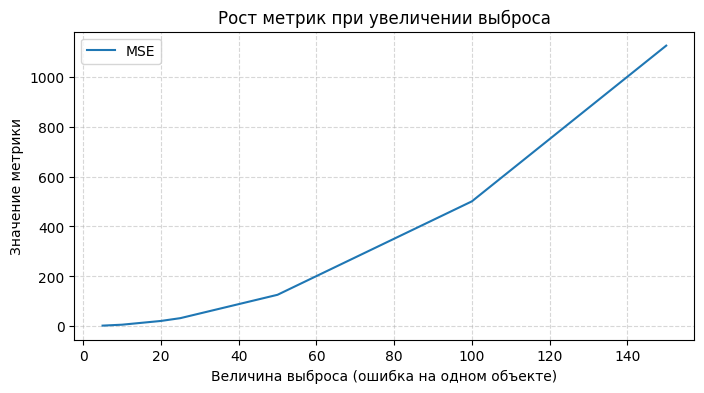

In [28]:
np.random.seed(0)
n = 20
y_true = np.linspace(50, 60, n)
y_pred = y_true + np.random.normal(0, 0.5, n) 


y_pred_outlier = y_pred.copy()
y_pred_outlier[-1] = y_true[-1] + 25.0 

def metrics(y_true, y_pred):
    err = y_pred - y_true    
    mse = np.mean(err**2)    
    return  mse,  err

mse1, err1 = metrics(y_true, y_pred)
mse2,  err2 = metrics(y_true, y_pred_outlier)

df_summary = pd.DataFrame({
    "Метрика": [ "MSE"],
    "Без выброса": [ mse1],
    "С выбросом": [ mse2],
})
print("Сравнение метрик без/с выбросом:")
print(df_summary.to_string(index=False))

magnitudes = [5, 10, 20, 25, 50,100,150]
mse_vals = []
for m in magnitudes:
    yp = y_pred.copy()
    yp[-1] = y_true[-1] + m
    mse,_ = metrics(y_true, yp)
    mse_vals.append([  mse])

plt.figure(figsize=(8,4))

plt.plot(magnitudes, mse_vals, label="MSE")
plt.xlabel("Величина выброса (ошибка на одном объекте)")
plt.ylabel("Значение метрики")
plt.title("Рост метрик при увеличении выброса")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

### 2. Root Mean Squared Error (RMSE)
$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

In [29]:

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print("RMSE:", rmse)

RMSE: 0.6123724356957945


Сравнение метрик без/с выбросом:
Метрика  Без выброса  С выбросом
    MSE     0.261738    31.50262
    MAE     0.399223     1.62787


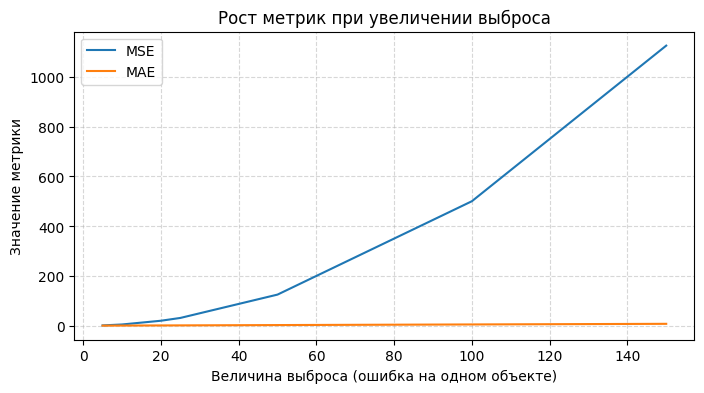

In [31]:
np.random.seed(0)
n = 20
y_true = np.linspace(50, 60, n)
y_pred = y_true + np.random.normal(0, 0.5, n) 


y_pred_outlier = y_pred.copy()
y_pred_outlier[-1] = y_true[-1] + 25.0 

def metrics(y_true, y_pred):
    err = y_pred - y_true    
    mse = np.mean(err**2)  
    mae = np.mean(np.abs(err))  
    return  mse, mae, err

mse1,mae1, err1 = metrics(y_true, y_pred)
mse2,mae2,  err2 = metrics(y_true, y_pred_outlier)

df_summary = pd.DataFrame({
    "Метрика": [ "MSE","MAE"],
    "Без выброса": [ mse1,mae1],
    "С выбросом": [ mse2,mae2],
})
print("Сравнение метрик без/с выбросом:")
print(df_summary.to_string(index=False))

magnitudes = [5, 10, 20, 25, 50,100,150]
mse_vals = []
mae_vals = []
for m in magnitudes:
    yp = y_pred.copy()
    yp[-1] = y_true[-1] + m
    mse,mae,_ = metrics(y_true, yp)
    mse_vals.append([mse])
    mae_vals.append([mae])


plt.figure(figsize=(8,4))

plt.plot(magnitudes, mse_vals, label="MSE")
plt.plot(magnitudes, mae_vals, label="MAE")
plt.xlabel("Величина выброса (ошибка на одном объекте)")
plt.ylabel("Значение метрики")
plt.title("Рост метрик при увеличении выброса")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

### 3. Коэффициент детерминации \(R^2\)
$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$
где  
$$
\bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_i
$$

In [92]:
from sklearn.metrics import r2_score

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

r2 = r2_score(y_true, y_pred)
print("R²:", r2)

R²: 0.9486081370449679


### 4. Mean Absolute Error (MAE)
$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \big| y_i - \hat{y}_i \big|
$$


In [30]:
from sklearn.metrics import mean_absolute_error

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

mae = mean_absolute_error(y_true, y_pred)
print("MAE:", mae)

MAE: 0.5


### 5. Mean Absolute Percentage Error (MAPE)
$$
\text{MAPE} = \frac{100\%}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right|
$$

In [32]:
from sklearn.metrics import mean_absolute_percentage_error

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

mape = mean_absolute_percentage_error(y_true, y_pred)
print("MAPE:", mape)

MAPE: 0.3273809523809524


### 6. Symmetric Mean Absolute Percentage Error (sMAPE)
$$
\text{sMAPE} = \frac{100\%}{n} \sum_{i=1}^{n} \frac{2 \cdot |y_i - \hat{y}_i|}{|y_i| + |\hat{y}_i|}
$$

In [95]:
def smape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))


y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

print("sMAPE:", smape(y_true, y_pred))

sMAPE: 57.878787878787875


In [100]:
def to_2d(a):
    a = np.asarray(a)
    return a.reshape(-1, 1) if a.ndim == 1 else a

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [34]:
pipe_knn = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', KNeighborsRegressor(n_neighbors=5, weights='distance', p=2))
])
pipe_knn.fit(X_train, y_train)
y_pred_knn = pipe_knn.predict(X_test)
print("KNN + Poly")
print("  R^2 (test):", r2_score(y_test, y_pred_knn))
print("  MSE (test):", mean_squared_error(y_test, y_pred_knn))
print("  RMSE (test):", mean_squared_error(y_test, y_pred_knn, squared=False))

KNN + Poly
  R^2 (test): 0.3559153420631066
  MSE (test): 3412.4582566410686
  RMSE (test): 58.416249936478025


In [35]:
from sklearn.model_selection import GridSearchCV
base = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', KNeighborsRegressor())
])

param_grid_knn = {
    'poly__degree': [1, 2, 3, 4, 5],
    'model__n_neighbors': [3, 5, 7, 11, 21],
    'model__weights': ['uniform', 'distance'],
    'model__p': [1, 2],  # 1 — L1, 2 — L2
}
grid_knn = GridSearchCV(
    base, param_grid_knn, cv=5, scoring='r2', n_jobs=-1, verbose=1
)
grid_knn.fit(X_train, y_train)

print("Лучшие параметры (KNN):", grid_knn.best_params_)
print("Лучший R^2 (CV, KNN):", grid_knn.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Лучшие параметры (KNN): {'model__n_neighbors': 21, 'model__p': 2, 'model__weights': 'distance', 'poly__degree': 1}
Лучший R^2 (CV, KNN): 0.40233085798170354


In [36]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())  
])

param_grid = [

    # 1) KNN Regressor
    {
        'model': [KNeighborsRegressor()],
        'model__n_neighbors': [3, 5, 7, 11, 21],
        'model__weights': ['uniform', 'distance'],
        'model__p': [1, 2],  # 1: манхэттен, 2: евклид
    },

    # 2) Ridge
    {
        'model': [Ridge()],
        'model__alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
        'model__fit_intercept': [True, False]
    },

    # 3) Lasso
    {
        'model': [Lasso(max_iter=10000)],
        'model__alpha': [0.0005, 0.001, 0.01, 0.1, 1.0],
        'model__fit_intercept': [True, False]
    },

    # 4) ElasticNet
    {
        'model': [ElasticNet(max_iter=10000)],
        'model__alpha': [0.0005, 0.001, 0.01, 0.1, 1.0],
        'model__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
        'model__fit_intercept': [True, False]
    },

    # 5) LinearRegression
    {
        'model': [LinearRegression()],
        'model__fit_intercept': [True, False]
        
    },
]
scoring = {
    'r2': 'r2',
    'neg_mse': 'neg_mean_squared_error',  
}

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring=scoring,
    refit='r2',     # лучшая модель выбирается по R^2
    cv=5,    
    verbose=1
)

grid.fit(X_train, y_train)

print("Лучшая модель:", grid.best_estimator_['model'].__class__.__name__)
print("Лучшие параметры:", grid.best_params_)
print("Лучшее значение R^2 (CV):", grid.best_score_)

# Оценка на тесте
y_pred = grid.predict(X_test)
print("\nТестовый R^2:", r2_score(y_test, y_pred))
print("Тестовый MSE:", mean_squared_error(y_test, y_pred))



Fitting 5 folds for each of 92 candidates, totalling 460 fits
Лучшая модель: ElasticNet
Лучшие параметры: {'model': ElasticNet(max_iter=10000), 'model__alpha': 0.1, 'model__fit_intercept': True, 'model__l1_ratio': 0.1}
Лучшее значение R^2 (CV): 0.4560324781297007

Тестовый R^2: 0.4600100965892059
Тестовый MSE: 2860.9484509372096
